In [2]:
# Importing Python Libraries

import pandas as pd
print ('Pandas version:', pd.__version__)

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version:', mpl.__version__)

from datetime import datetime
import time

from statsmodels.tsa.seasonal import seasonal_decompose

Pandas version: 1.2.1
Matplotlib version: 3.3.2


We will use pandas to analyze the two datasets we have, and so we first need to create two dataframes after reading the two csv files. 

In [3]:
downloads = pd.read_csv('cs_downloads.csv', parse_dates=['date'])
usage = pd.read_csv('cs_usage.csv', parse_dates=['date'])

After using pandas to read the data files, it's important to split lyft data from uber data.

In [4]:
#variables ending with _d refer to downloads, and those ending with _u refer to usage data
lyft_d = downloads[downloads['ticker'] == 'LYFT']
uber_d = downloads[downloads['ticker'] == 'UBER']
lyft_u = usage[usage['ticker'] == 'LYFT']
uber_u = usage[usage['ticker'] == 'UBER']


to make sure everything is alright:

In [5]:
lyft_d.head()


,ticker,date,total_downloads,free_downloads
0,LYFT,2020-01-01,118179,118179
1,LYFT,2020-01-02,86367,86367
2,LYFT,2020-01-03,79155,79155
3,LYFT,2020-01-04,75374,75374
4,LYFT,2020-01-05,68994,68994


In [6]:
lyft_d.tail()

,ticker,date,total_downloads,free_downloads
387,LYFT,2021-01-22,46587,46587
388,LYFT,2021-01-23,50547,50547
389,LYFT,2021-01-24,50858,50858
390,LYFT,2021-01-25,41819,41819
391,LYFT,2021-01-26,42479,42479


Starting with total downloads data, we should firstly plot the total downloads against time during the one-year period we have in hand. Due to expected fluctuation in the data we have, it's important to plot the moving (rolling) average and standard deviations on the same plots. This will be done over windows of 15 days. 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


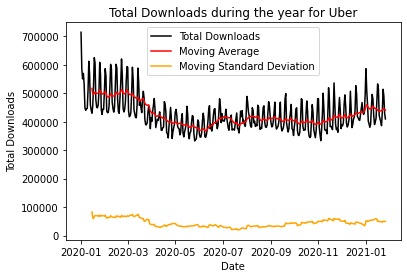

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


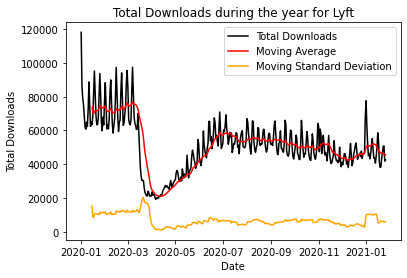

In [7]:
window = 15 
count = 0 

for df in [uber_d, lyft_d]: 
    df["Rolling_mean"]= df['total_downloads'].rolling(window).mean()
    df["Rolling_std"]= df['total_downloads'].rolling(window).std()
    plt.figure()
    plt.plot(df['date'], df["total_downloads"], color='#000000', label = "Total Downloads")
    ## rolling mean in red
    plt.plot(df['date'], df["Rolling_mean"], color='#FF0000', label = "Moving Average")
    ## rolling standard deviation in orange 
    plt.plot(df['date'], df["Rolling_std"], color='#FFA500', label = "Moving Standard Deviation")
    plt.xlabel('Date')
    plt.ylabel("Total Downloads")
    plt.legend()
    if count == 0: 
        plt.title("Total Downloads during the year for Uber")
    else: 
        plt.title("Total Downloads during the year for Lyft")
    count += 1
    plt.show()

Looking at the above two graphs, we can notice that while Lyft had a more significant drop in its total downloads around the start of COVID-19, it was able to form a sharp rise in 2 months. Uber, on the other hand, had a much less of a drop of its downloads but it took a longer time to rebound to a number of downloads close to that pre-COVID-19. We can also notice that after that rebound, Lyft wasnt able to maintain that rise and started forming a downward trend since June. Differently, Uber was able to maintain a slow growth in the number of total downloads up until this very day. 
We also see that Uber had a standard deviation that was smaller than that of Uber in relation to their respective means, meaning that Lyft number of total downloads were more volatile.
The infromation analyzed from those plots imply that Uber performed better than Lyft in the number of total downloads during 2020.

After looking over the trends of both companies, it's worth being able to compare them together. Since Uber and Lyft have a very different number of downloads for every month, one way to compare is to analyze the weekly percentage change of total downloads for both apps. 

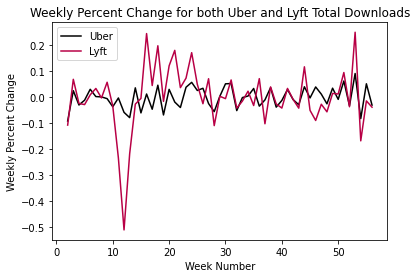

In [8]:
count = 0 
plt.figure()

for df in [uber_d, lyft_d]: 
    #group every 7 days together and sum their values (total number of days)
    weekly_df = df.groupby(df.index // 7).sum()
    #insert the number of weeks as a column in the data frame
    weekly_df.insert(0, 'week', [i for i in range(1, len(weekly_df)+1)])
    weekly_returns = weekly_df['total_downloads'].pct_change()

    if count == 0: 
        company = "Uber"
        color = "#000000"
    else: 
        company = "Lyft"
        color = '#b80045'   
        
    plt.plot(weekly_df['week'], weekly_returns, color=color, label = company )
    
    count += 1
    
plt.title("Weekly Percent Change for both Uber and Lyft Total Downloads")
plt.xlabel('Week Number')
plt.ylabel("Weekly Percent Change")
plt.legend()
plt.show() 

This plot confirms the conclusion that Lyft was a lot more volatile in its number of downloads than Lyft. We see that from week to week, Lyft sometimes had significant rise and drops in the number of total downloads relative to the previous week, while Uber maintained a constant trend with an almost +-0.1% change. While it might be thought that having some 0.2% percent changes in the number of downloads in some weeks make Lyft look more impressive, the argument becomes no longer valid when we have drops with the same percentages. The consistency Uber maintained means that Uber, yet again, performed better than Lyft in the number of total downloads. 


After looking on the total number of downloads and how they changed over the year, we'll be looking over how people used the application differently during different weekdays on average. 

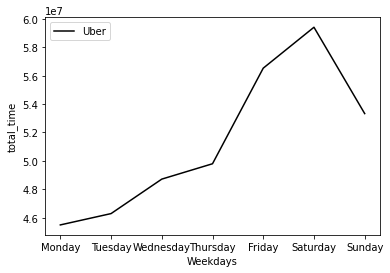

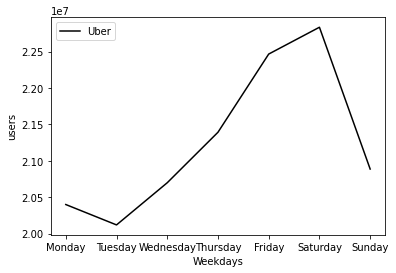

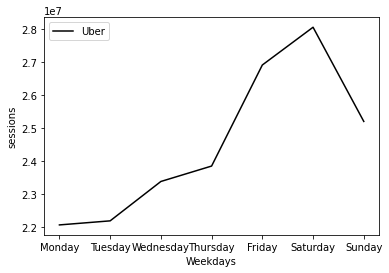

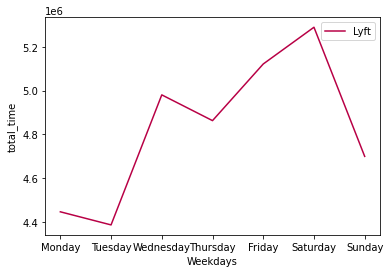

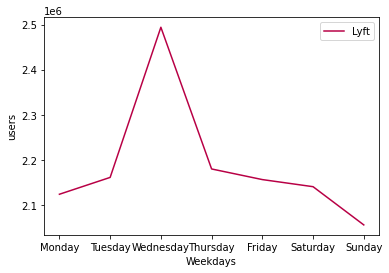

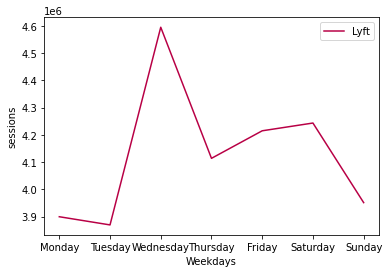

In [9]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
properties = ["total_time", "users", "sessions"]

def usage_plotting(df, prop, company, color): 
    plt.figure() 
    plt.plot(df["Day"], df[prop],color=color, label = company)
    plt.xlabel('Weekdays')
    plt.ylabel(prop)
    plt.legend()
    plt.show() 

## count 0 stands for uber, but 1 stands dfor lyft (just a way to keep 
#track of which company i'm plotting)
count = 0 

for df in [uber_u, lyft_u]: 

    weekdays_usage = df.groupby(df['date'].dt.weekday).mean()
    weekdays_usage["Day"] = days 
    if count == 0: 
        company = "Uber"
        color = "#000000"
        uber_weekdays_usage = weekdays_usage
    else: 
        company = "Lyft"
        color = '#b80045'
        lyft_weekdays_usage = weekdays_usage
        
    
    for prop in properties: 
        usage_plotting(weekdays_usage, prop, company, color)
    
    count += 1


While Uber plots match the expectation that there are more users, sessions and a higher usage time during weekends than weekdays, this trend wasnt obvious on Lyft's plots. 
We can see that the time spent increased when going towards the weekends, but the total number of users and number of sessions were declining and reached the top on Wednesday. To get more insight about this odd trend, it is important to look into how much time the average user spends on the application.

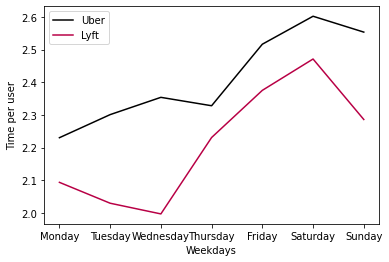

In [10]:
count = 0 
plt.figure() 
for df in [uber_weekdays_usage, lyft_weekdays_usage]:
    if count == 0: 
        company = "Uber"
        color = "#000000"
    else: 
        company = "Lyft"
        color = '#b80045'
    ##divide total time by the number of users 
    df["time_per_user"]= df["total_time"]/df["users"]
    plt.plot(df["Day"], df["time_per_user"],color=color, label = company)
    count += 1

plt.xlabel('Weekdays')
plt.ylabel('Time per user')
plt.legend()
plt.show() 


We can see a more obvious trend when looking over the time spent on average per user for both apps: both increase towards the weekends. We can infer from this that while Lyft has some very high number of users on same days like Wednesday, it has a very low average time spent per user. This might mean that Lyft wasn't satisying to many users who opened the app to take a ride but didnt proceed with it (probably due to bad prices or the lack of cars). 
Additionally, beside the fact that Uber had more users than Lyft, we can see from the above plot that Uber users spent more time on average on the application than Lyft users. 
This all tell that Uber also outperformed Lyft in terms of usage statistics. 

Seasonality

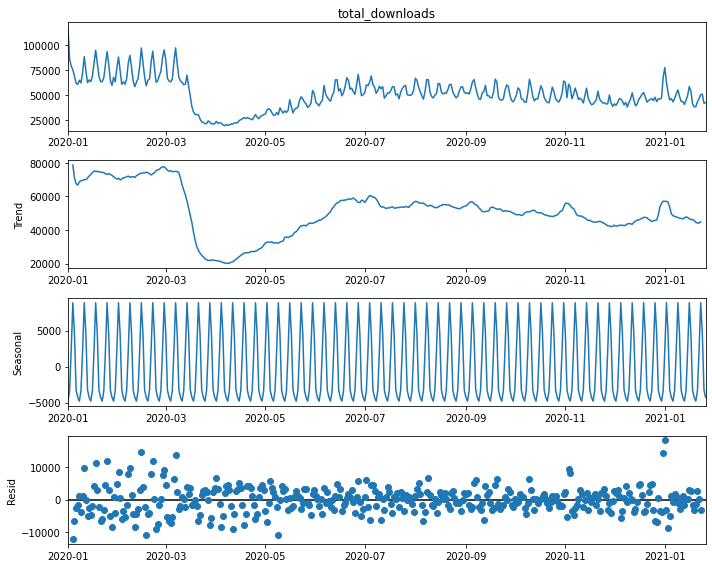

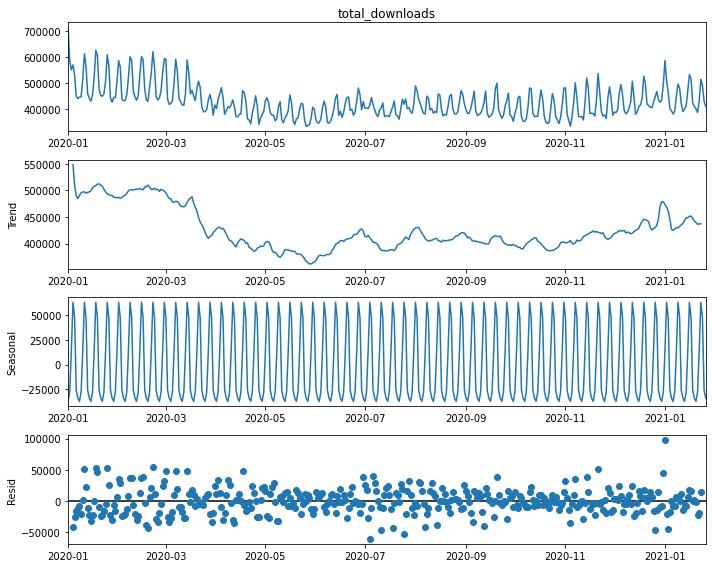

In [11]:
"""
Seasonality Analysis 
"""

lyft_d = lyft_d.set_index('date')
res = seasonal_decompose(lyft_d['total_downloads'],model='additive')
plt.rcParams['figure.figsize'] = (10, 8)
x = res.plot()



uber_d = uber_d.set_index('date')
res = seasonal_decompose(uber_d['total_downloads'],model='additive')
plt.rcParams['figure.figsize'] = (10, 8)
x = res.plot()



The two seasonality graphs above show that the data shows a seasonal pattern. However, seasonalities usually make more sense when the data is distributed over many years. 



There are few limitations of the above study that I would have solved had I been given more time. 

One limitation of the study is the low accuracy of the numbers. Since Lyft had a smaller base of users and smaller number of downloads in all times, then a fluctuation in Lyft's data would result in a percent change that is a lot higher to its equivalent fluctuation in Uber's data. This made our calculations and data visualization plots a bit flawed. One way to solve this is to standardize the data before working on anything to ensure a higher accuracy of the results and an easier interpretation. 

Another thing is the possibility of the existence of a lot of outliers that could have had a disproportionate effect on our results. We have to detect them first which can be done using a boxplot as one of the ways, and possibly remove them or implement log transformation on the datapoints afterwards. As a first step to detect them, we can see in the boxplot below that there are few points that are outside the (Q1 - 1.5*IQR, Q3 + 1.5*IQR) range. In another way, we can see that those are 40 data points out of the (5th quartile, 95th quartile) range that we can also consider as outliers.

<AxesSubplot:xlabel='total_downloads'>

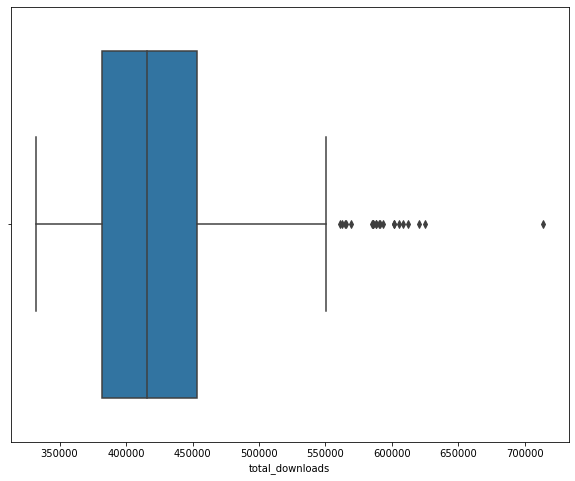

In [12]:
import seaborn as sns
sns.boxplot(x=uber_d['total_downloads'])

In [13]:
y = uber_d["total_downloads"]
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
print(removed_outliers.value_counts())

True     352
False     40
Name: total_downloads, dtype: int64
